In [1]:
#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

# 导入数据：残耗

In [2]:
data=pd.read_excel(r"./data/残耗.xlsx")
data.head(6).style


,编号,v残耗,v2样品序列,v1合成剂,v3燃料类型,v2添加渠道,v1执勤时效1,助燃点,烟碱量,气体综合,消耗烟脂,吸阻,吸阻过滤,检查点位,圆周点位,焦油量,助燃添加,助燃反应,烟碱HW,钾元素,钠元素,助燃柠檬,助燃,过滤时效,噪声,温控,偏离位,标注,起点位,撤回点位,收紧度,通路,lHH
0,GA#C0001,64.200000,1.000000,2.000000,2.000000,4.000000,1.000000,210.647000,1191.000000,1613.400000,nan,581.400000,76.400000,nan,375.400000,47.400000,29.410000,117.400000,541.400000,nan,388.400000,64.400000,37.922000,450.400000,14.920000,21.400000,203.000000,47.640000,87.887000,181.400000,19.500000,32.573000,2222.400000
1,GA#C0002,43.200000,1.000000,1.000000,1.000000,4.000000,1.000000,48.473000,285.000000,465.400000,30.400000,359.400000,33.400000,82.800000,286.400000,34.400000,29.520000,134.400000,343.400000,65.400000,264.400000,189.400000,28.901000,403.400000,6.427000,28.400000,94.000000,38.560000,38.560000,107.400000,61.487000,43.053000,25528.400000
2,GA#C0003,35.200000,1.000000,1.000000,1.000000,2.000000,1.000000,96.733000,670.000000,1092.400000,31.900000,754.400000,40.400000,83.800000,-171.600000,84.400000,29.420000,663.400000,251.400000,65.400000,-160.600000,292.400000,34.620000,224.400000,11.113000,87.400000,460.000000,94.773000,64.827000,441.400000,31.660000,34.173000,1884.400000
3,GA#C0004,36.200000,1.000000,2.000000,nan,2.000000,1.000000,67.380000,2316.000000,3496.400000,30.300000,1178.400000,43.400000,80.800000,-75.600000,116.400000,29.510000,1039.400000,251.400000,nan,-97.600000,nan,28.477000,171.400000,6.153000,28.400000,364.000000,45.720000,45.720000,377.400000,5.273000,30.467000,5882.400000
4,GA#C0005,26.200000,1.000000,2.000000,2.000000,4.000000,1.000000,59.107000,606.000000,1137.400000,nan,1199.400000,28.400000,nan,83.400000,49.400000,29.480000,51.400000,152.400000,65.400000,52.400000,986.400000,28.452000,680.400000,5.133000,30.400000,106.000000,45.580000,40.237000,128.400000,5.260000,30.433000,20894.400000
5,GA#C0006,114.200000,1.000000,2.000000,4.000000,2.000000,2.000000,307.107000,395.000000,749.400000,32.900000,900.400000,82.400000,113.800000,920.400000,30.400000,29.450000,223.400000,1655.400000,64.400000,935.400000,6690.400000,29.819000,7359.400000,7.507000,nan,772.000000,528.967000,420.370000,748.400000,5.653000,30.407000,2986.400000


# 第1，2，3步，确定需求、y、x
# 第4步：描述数据——分布、平衡

,v残耗,v2样品序列,v1合成剂,v3燃料类型,v2添加渠道,v1执勤时效1,助燃点,烟碱量,气体综合,消耗烟脂,...,过滤时效,噪声,温控,偏离位,标注,起点位,撤回点位,收紧度,通路,lHH
count,44801.000000,56592.000000,54327.000000,53307.000000,53697.000000,53319.000000,56708.000000,51249.000000,55431.000000,34581.000000,...,54032.000000,41455.000000,44756.000000,54187.000000,54271.000000,54319.000000,54267.000000,56119.000000,53561.000000,51071.000000
mean,53.389929,1.053559,1.754855,2.499672,2.846733,1.112605,123.885846,1309.085504,1798.157446,34.624901,...,1839.143652,9.302501,31.943815,341.372857,136.280584,131.745197,357.135640,15.795586,32.691832,11350.596883
std,23.205868,0.264217,0.430177,1.118455,1.162560,0.316113,168.617271,2156.836973,2887.458602,35.893644,...,2320.452901,9.258102,49.526777,477.125591,185.629531,154.954627,417.194372,15.870646,3.578928,24194.736360
min,14.200000,1.000000,1.000000,1.000000,1.000000,1.000000,28.447000,5.000000,49.400000,28.400000,...,27.400000,-39.313000,-2267.600000,16.000000,28.407000,28.407000,29.400000,5.007000,30.407000,32.400000
25%,36.200000,1.000000,2.000000,1.000000,2.000000,1.000000,39.300000,125.000000,212.400000,30.400000,...,436.400000,5.360000,25.400000,135.000000,41.467000,46.424500,177.400000,5.820000,30.527000,565.400000
50%,48.200000,1.000000,2.000000,3.000000,2.000000,1.000000,65.327000,547.000000,777.400000,32.400000,...,1121.400000,6.387000,30.400000,232.000000,71.853000,80.576000,269.400000,8.540000,31.027000,2440.400000
75%,65.200000,1.000000,2.000000,3.000000,4.000000,1.000000,137.880000,1720.000000,2325.400000,35.300000,...,2481.400000,9.460000,39.400000,413.000000,154.466500,155.599500,426.400000,18.467000,33.213000,10285.400000
max,114.200000,3.000000,2.000000,4.000000,5.000000,2.000000,1751.053000,34194.000000,45503.400000,2695.100000,...,45462.400000,284.707000,3352.400000,35815.000000,1751.013000,1751.013000,35828.400000,72.140000,44.907000,194360.400000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32791 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26679 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24207 missing from current font.
  font.s

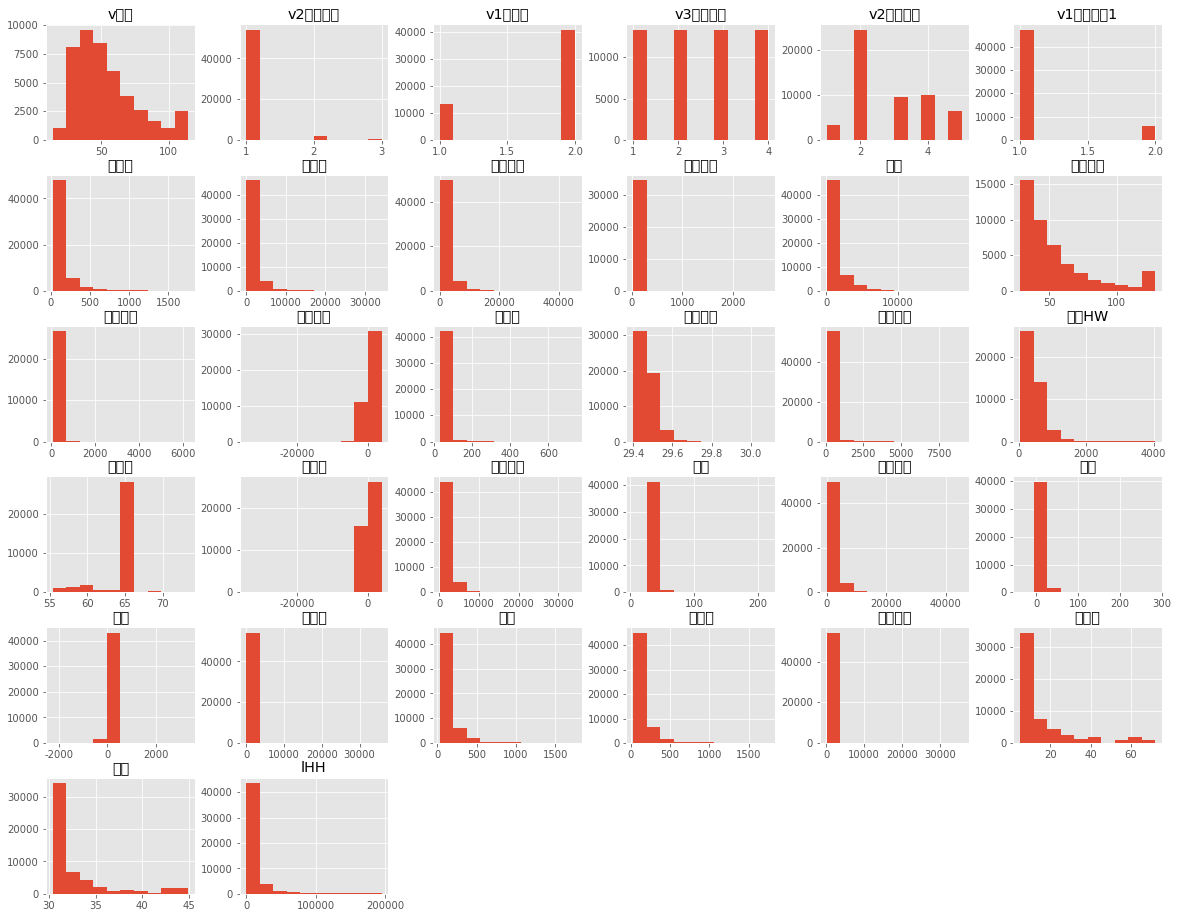

In [3]:
#描述数据——获取每个变量的分布形态、均值、中位数、最大值、最小值等常用指标。
#分布形态——记录分布异常的变量
data.iloc[:,1:].hist(figsize=(20,16))
#统计量
data.iloc[:,1:].describe()
# print('偏度：',data['v残耗'].mean()-data['v残耗'].median())

# 第5步1：缺失值描述
## 缺失值：可视化

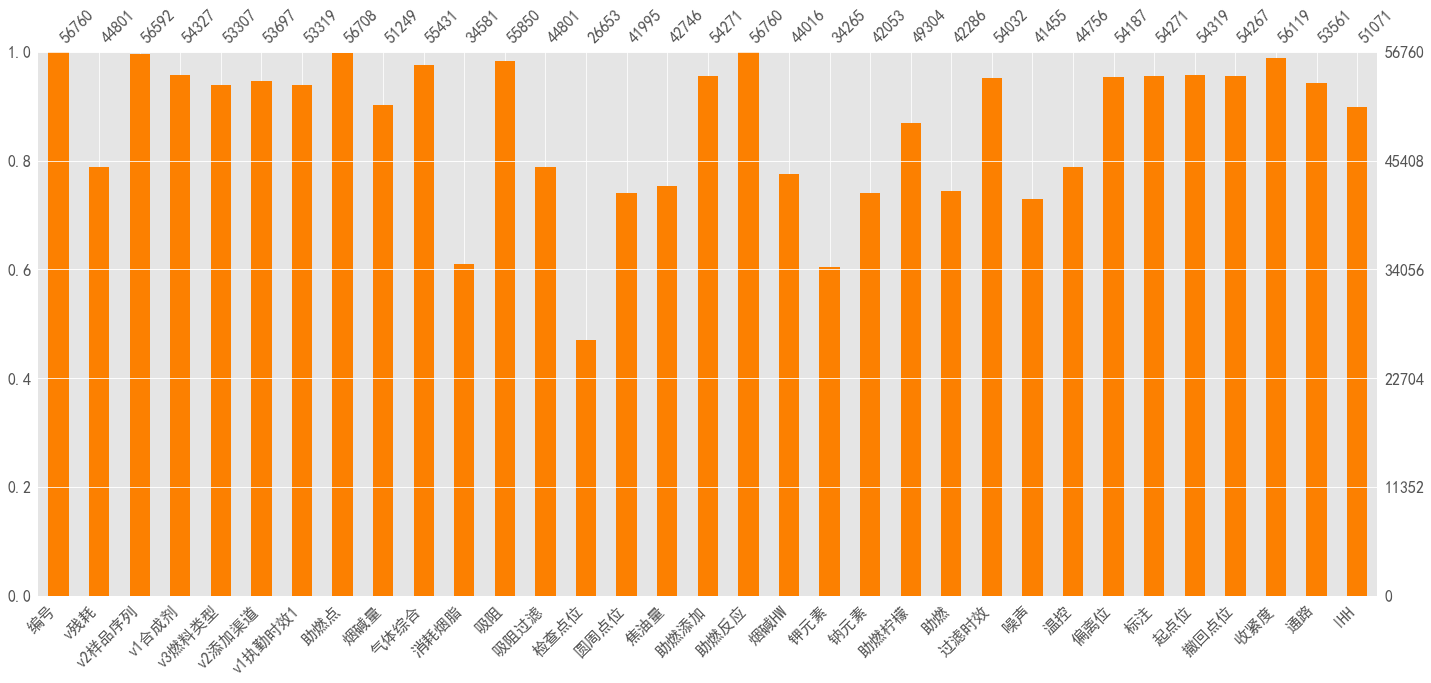

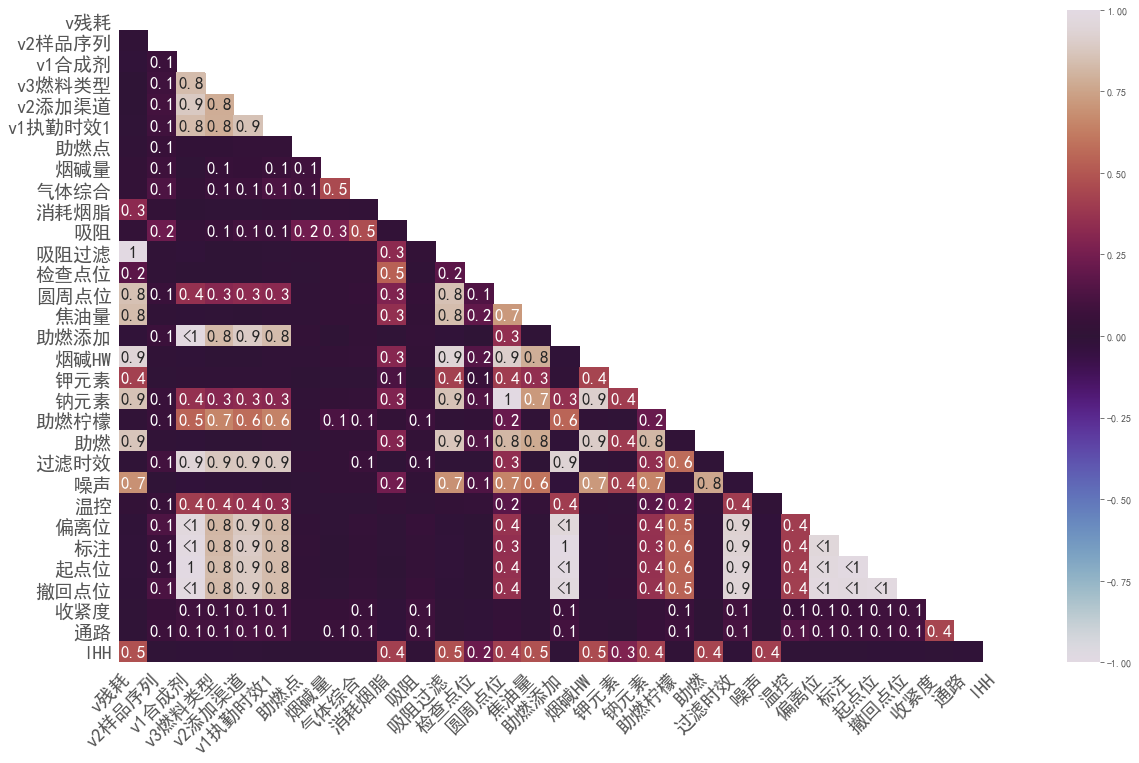

In [104]:
#----------第5步--------------
#5.1 缺失值---60%以上的缺失，分类法处理或删除，其他中位数填补;
import missingno
# -----------缺失值描述-----------
missingno.bar(data,color=(0.99,0.5,0)) ;

missingno.heatmap(data,             #缺失值之间的相关性
                  fontsize=19,      #字体大小
                  cmap='twilight'   #图像格式
                 )   ;
# missingno.dendrogram(data) ;         #缺失值变量的聚类

## 缺失值：填补——大数据包

In [9]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

# data51=data.fillna(value=data.median())#中位数填补（中位数模型77.5%，随机森林79.2%）

#-----------或使用模型填补----------
from missingpy import KNNImputer,MissForest
imput=MissForest(n_estimators=1,min_samples_leaf=9000,n_jobs=-1,copy=False)
data5=imput.fit_transform(data.iloc[:,1:])
data51=pd.DataFrame(data5,columns=data.iloc[:,1:].columns)

#构建模型评估
x,y=data51.iloc[:,1:],data51['v残耗']
reg=linear_model.LinearRegression()
reg.fit(x,y)
reg.score(x,y)  

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


0.7907576754529974

# 第5步2：异常值：缩尾处理

In [10]:
# 5.2异常值---强异常值的处理（模型83%）
var=[(-0.01,'lHH',140000),(-0.01,'偏离位',10000),(0,'助燃',100),(-0.01,'助燃反应',2000),
     (-0.01,'助燃柠檬',10000),(20,'助燃添加',29.7),(0,'助燃点',1000),(-0.01,'吸阻',1000),
     (10,'吸阻过滤',129),(0,'噪声',100),(-10000,'圆周点位',29.7),(-0.01,'撤回点位',1000),
     (0,'收紧度',1000),(0,'标注',129),(0,'检查点位',100),(-0.01,'气体综合',10000),
     (0,'消耗烟脂',500),(-200,'温控',200),(-0.01,'烟碱HW',2000),(-0.01,'烟碱量',10000),
     (0,'焦油量',200),(-0.01,'起点位',1000),(-0.01,'过滤时效',1500),(30,'通路',40),
     (-10000,'钠元素',500),(20,'钾元素',100)
    ]
for (t,i,j) in var:
    data51[i+str("01")]=np.where(data51[i]>=j,j,
                                               np.where(data51[i]<=t,t,data51[i].copy()))
#     print(data51[i+str("01")].describe())
# data51.info()
data52=data51.iloc[:,[*range(0,6),*range(32,58)]]
x,y=data52.iloc[:,1:],data52['v残耗']
reg=linear_model.LinearRegression().fit(x,y)
reg.score(x,y) 
# data52.head(2)

0.8268266573210151

# 第5步3：特征筛选

In [11]:
#5.3 特征筛选(Filter过滤法)--业务上不重要的
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_regression

x,y=data52.iloc[:,1:],data52['v残耗']
fit=SelectPercentile(score_func=f_regression,percentile=70)
fitt=fit.fit_transform(x,y)
data53=pd.concat([data52['v残耗'],x.iloc[:,fit.get_support(indices=True)]],axis=1)
data53.shape

(56760, 22)

# 第5步4：共线性

## 共线性描述：相关系数

In [ ]:
#共线性--严重共线性0.9以上，合并或删除
d=data53.corr()
colormap = sns.diverging_palette(250, 5, as_cmap = True) 
d[d<=0.9]=0.01                  #赋值显示高相关的变量
sns.heatmap(d,cmap=colormap)

## 共线性描述：散点图

[0.9801630985026492, 0.9157091860921202]


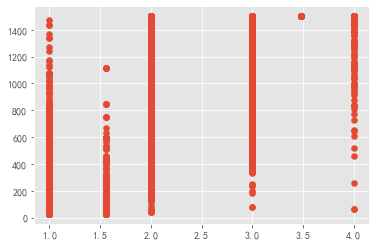

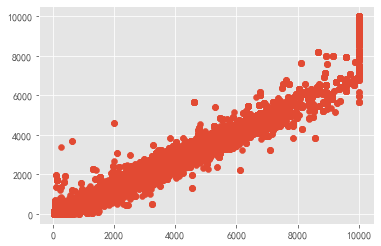

In [13]:
print([data53['气体综合01'].corr(data53['烟碱量01']),data53['过滤时效01'].corr(data53['v3燃料类型'])])
plt.scatter(data53['v3燃料类型'],data53['过滤时效01']);   #删除过滤时效01，在业务上不重要
plt.show()
plt.scatter(data53['气体综合01'],data53['烟碱量01']);

## 共线性处理：曲线拟合

In [15]:
#拟合线性形式的模型
from scipy.optimize import curve_fit

def f(x,b0,b1):
    return b0+b1*x  #调整x和y的任意函数关系,如b0*np.exp(b1*dt['x'])
popt,_=curve_fit(f,data53["烟碱量01"],data53["气体综合01"])
b0=popt[0]
b1=popt[1]

data53["成分烟碱"]=b0+b1*data53["烟碱量01"]#整合新字段并计算r方
# print("r**2:",(data53["成分烟碱"].corr(data53['v残耗'])))#如果与y的相关高于单个x与y的相关则保留；
data54=data53.drop(["气体综合01",'过滤时效01',"烟碱量01"],axis=1)#最终决定删除"气体综合01"和'过滤时效01'

## 非线性：函数与图形

<ipython-input-14-8f1ddba185df>:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.subplot(234);b0=5;b1=2;x=np.random.randint(0,10,100);y=b0 + (b1 / x)
<ipython-input-14-8f1ddba185df>:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.subplot(236);b0=5;b1=2;x=np.random.randint(-100,100,100);y=np.exp(b0 + (b1/x))


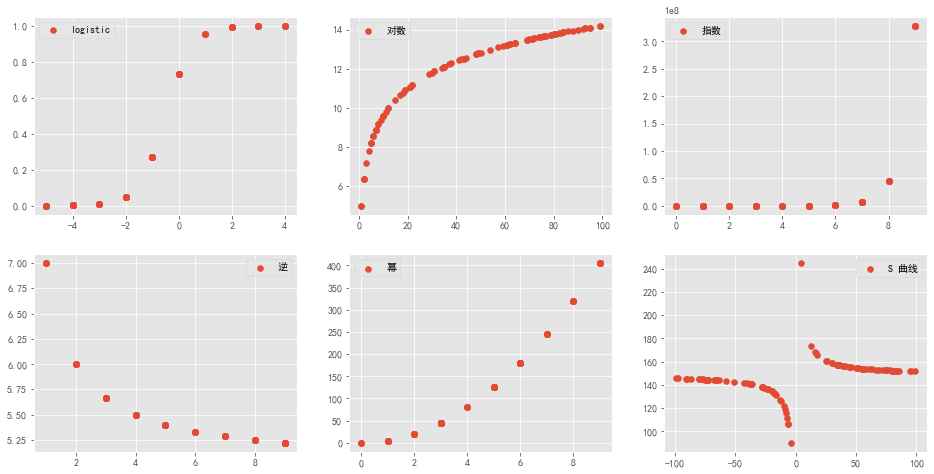

In [14]:
#--------------函数及图形---------------------------
plt.subplots(2,3,figsize=(16,8));b0=1;b1=2;
plt.subplot(231);x=np.random.randint(-5,5,100);y=1/(1+np.exp((-b0-b1*x)))
plt.scatter(x,y,label='logistic');plt.legend()
plt.subplot(232);b0=5;b1=2;x=np.random.randint(0,100,100);y=b0 + (b1 * np.log(x))
plt.scatter(x,y,label='对数');plt.legend()
plt.subplot(233);b0=5;b1=2;x=np.random.randint(0,10,100);y=b0 * (np.exp((b1 * x))) 
plt.scatter(x,y,label='指数');plt.legend()
plt.subplot(234);b0=5;b1=2;x=np.random.randint(0,10,100);y=b0 + (b1 / x) 
plt.scatter(x,y,label='逆');plt.legend()
plt.subplot(235);b0=5;b1=2;x=np.random.randint(0,10,100);y=b0 * (x**b1)
plt.scatter(x,y,label='幂');plt.legend()
plt.subplot(236);b0=5;b1=2;x=np.random.randint(-100,100,100);y=np.exp(b0 + (b1/x))
plt.scatter(x,y,label='S 曲线');plt.legend()

# 第5步5：变量变换y

In [102]:
#5.5 变量变换-----关注y是否需要变换
# data54['v残耗log']=np.log(data54['v残耗'])#本案例中无需变换

# 第5步6：编码y

In [103]:
#编码-----消除异常值、分组（标签化）
# data54['v残耗'].hist()
# data54['v残耗01']=pd.cut(data54['v残耗'],bins=[14,100,120],labels=['正常','异常'])#或使用qcut中q%分箱
# data54[['v残耗01','v残耗']].head(6)

# 第6步：构建（大）模型

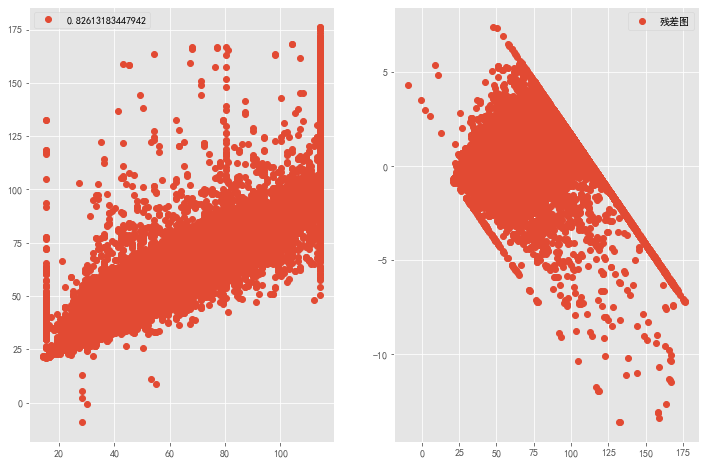

In [17]:
from sklearn.linear_model import LinearRegression
x,y=data54.iloc[:,1:],data54['v残耗']
reg=LinearRegression()
reg.fit(x,y)
reg.score(x,y)

plt.subplots(1,2,figsize=(12,8))
plt.subplot(121)
r2=reg.score(x,y);plt.plot(y,reg.predict(x),'o',label=r2)#r方评分和图示
plt.legend()
plt.subplot(122)
resid=y-reg.predict(x)
std_resid=(resid-np.mean(resid))/np.std(resid)           #计算标准残差
plt.plot(reg.predict(x),std_resid,'o',label="残差图")    #r方评分和图示
plt.legend()

# 第5步1+：缺失值——多变量

In [105]:
#-----------或使用模型填补----------
from missingpy import MissForest
# imput=MissForest(n_estimators=2,min_samples_leaf=5000,n_jobs=-1,copy=False)
# data5=imput.fit_transform(data.iloc[:,1:])
# data51=pd.DataFrame(data5,columns=data.iloc[:,1:].columns)

# 第5步2+：异常值——多变量

(56597, 20)
0.856343778639809


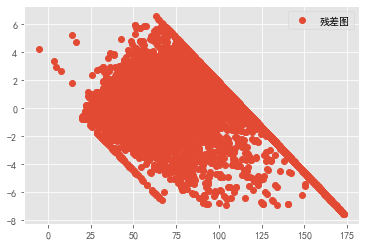

In [18]:
#5.2+ 异常值---多变量异常值处理
data54["标准化残差"]=std_resid#复制保存
data54_99=data54[np.abs(data54["标准化残差"])<=6]#设置异常条件
data54_2=data54_99.drop(["标准化残差"],axis=1)
print(data54_2.shape)

x,y=data54_2.iloc[:,1:],data54_2['v残耗']
reg=linear_model.LinearRegression()
reg.fit(x,y)
print(reg.score(x,y))
resid=y-reg.predict(x)
plt.plot(reg.predict(x),(resid-np.mean(resid))/np.std(resid),'o',label="残差图")#r方评分和图示
plt.legend()

# 第5步3+：特征筛选——多变量

In [19]:
#特征筛选(Wrapper包装法RFE;Embedded嵌入法SelectFromModel)
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import LinearSVR

x54_1,y54_1=data54_2.iloc[:,1:],data54_2['v残耗']
rfr=RandomForestRegressor(n_estimators=10,min_samples_leaf=10000)
selector=RFE(rfr,n_features_to_select=10).fit(x54_1,y54_1)
data54_3=pd.concat([data54_2['v残耗'],data54_2[data54_2.columns[selector.get_support(indices=True)]]],axis=1)
data54_3.head(2)

,v残耗,助燃柠檬01,助燃点01,吸阻01,吸阻过滤01,噪声01,撤回点位01,标注01,烟碱HW01,起点位01,钠元素01
0,64.2,64.4,210.647,581.4,76.4,14.920,181.4,47.64,541.4,87.887,388.4
1,43.2,189.4,48.473,359.4,33.4,6.427,107.4,38.56,343.4,38.560,264.4


# 第5步4+：共线性——多变量

In [23]:
x_pca=data54_3.iloc[:,[1,2,3,4,5,7,9,10]]
x_raw=data54_3.iloc[:,[0,6,8]]

#自变量变换处理
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x_pca)

#共线性：主成分
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit_transform(x_std)
#pca.explained_variance_ratio_[:3].sum()
x_raw[['z1','z2','z3']]=pd.DataFrame(pca)
x_raw

C:\Users\dingding\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,v残耗,撤回点位01,烟碱HW01,z1,z2,z3
0,64.2,181.40000,541.4,-0.570580,-1.557030,-0.174716
1,43.2,107.40000,343.4,-1.652667,0.304494,-0.126257
2,35.2,441.40000,251.4,-0.140302,0.665252,0.564859
3,36.2,377.40000,251.4,-0.680787,0.734120,-0.091162
4,26.2,128.40000,152.4,-0.641622,0.834803,-0.062787
...,...,...,...,...,...,...
56755,47.2,715.40000,358.4,NaN,NaN,NaN
56756,31.2,158.40000,198.4,NaN,NaN,NaN
56757,43.2,239.40000,339.4,NaN,NaN,NaN
56758,55.2,140.40000,380.4,NaN,NaN,NaN


# 第5步5+：编码x

In [24]:
#编码--消除异常值、分组（标签化）
# x_raw['撤回点位01'].hist()
x_raw['撤回点位011']=pd.cut(x_raw['撤回点位01'],bins=[0,400,600,1001],labels=['低点位','中点位','高点位'])
dummy=pd.get_dummies(x_raw['撤回点位011'])
x_raw[['撤回点位_a','撤回点位_b','撤回点位_c']]=dummy
xx=x_raw.drop(['撤回点位01','撤回点位011'],axis=1)
xx

<ipython-input-24-d4129012ded1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_raw['撤回点位011']=pd.cut(x_raw['撤回点位01'],bins=[0,400,600,1001],labels=['低点位','中点位','高点位'])
C:\Users\dingding\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,v残耗,烟碱HW01,z1,z2,z3,撤回点位_a,撤回点位_b,撤回点位_c
0,64.2,541.4,-0.570580,-1.557030,-0.174716,1,0,0
1,43.2,343.4,-1.652667,0.304494,-0.126257,1,0,0
2,35.2,251.4,-0.140302,0.665252,0.564859,0,1,0
3,36.2,251.4,-0.680787,0.734120,-0.091162,1,0,0
4,26.2,152.4,-0.641622,0.834803,-0.062787,1,0,0
...,...,...,...,...,...,...,...,...
56755,47.2,358.4,NaN,NaN,NaN,0,0,1
56756,31.2,198.4,NaN,NaN,NaN,1,0,0
56757,43.2,339.4,NaN,NaN,NaN,1,0,0
56758,55.2,380.4,NaN,NaN,NaN,1,0,0


# 第5步6+：变换x（上一步已完成）

# 构建最终模型
## 非标准化回归系数

In [43]:
x_data,y_data=xx.iloc[:,[1,2,3,4,5,7]],xx.iloc[:,0]
x_data=x_data.fillna(value=x_data.median())       #中位数缺失值填补

reg=LinearRegression()
reg.fit(x_data,y_data)
print('回归系数:',reg.coef_.round(2))
print('R2:',reg.score(x_data,y_data))

回归系数: [ 0.08 -0.    0.01  0.01 -1.89  0.46]
R2: 0.8521208260563546


# 标准化系数:相对重要性

In [48]:
import plotly.express as px
import plotly.graph_objects as go

ztd=reg.coef_*x_data.var()**0.5/y_data.var()**0.5   #回归系数标准化
colors = ['正' if c > 0 else '负' for c in ztd]     #定义回归系数颜色

fig = px.bar(x=x_data.columns, 
             y=ztd,
             color=colors)
fig.show()

## 非标准化回归系数:主要归因解释

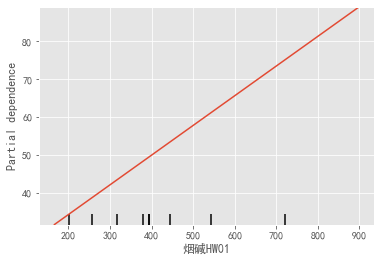

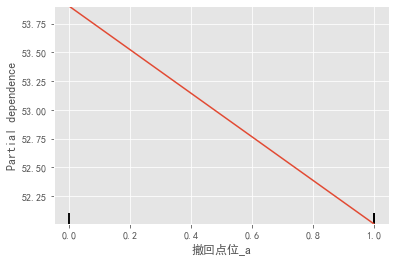

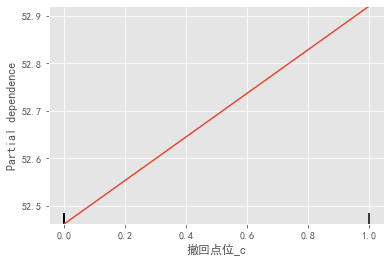

In [50]:
from sklearn.inspection import plot_partial_dependence       #偏回归图
plot_partial_dependence(reg, features=['烟碱HW01'], X=x_data);
plot_partial_dependence(reg, features=['撤回点位_a'], X=x_data);
plot_partial_dependence(reg, features=['撤回点位_c'], X=x_data);

## 回归系数的稳定性和重要性验证

In [51]:
from sklearn.inspection import permutation_importance                 #变量重要性验证
resultPer = permutation_importance(reg, x_data,y_data, n_repeats=6)
resultPer.importances.round(3)

array([[ 1.643,  1.642,  1.648,  1.637,  1.644,  1.642],
       [-0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ],
       [ 0.004,  0.003,  0.003,  0.003,  0.003,  0.003],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])